# cfDNA simulations 

Assess perform of our EM algorithm in pure simulated data 

# Functions

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

## Load EM results

In [2]:
def load_pickles(directory, parameter):
    """
    output from EM is a pickle file of estimate and true simulation values 
    load these pickles into dataframe 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")  # estimates from EM 
    df = pd.DataFrame(columns={"estimate", "individual", "truth", "tissue", "iteration"})  # intialize dataframe

    
    for file in range(len(est_files)):  # iterate over all random restarts in the directory 
        
        est_file = est_files[file]  # get all estimates 
        true_file = est_file.replace("est", "true")  # true simulations 
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for individual, pair in enumerate(zip(est, true)): 
            e, t = pair[0], pair[1]
            
            for i in range(len(t)):  # add each estimate for each tissue to dataframe 
                df = df.append({"estimate":e[i], "individual":individual, "truth":t[i], 
                            "tissue":i, "iteration":file}, ignore_index=True)
        
    return df


In [165]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    
    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for t in range(est.shape[0]): 
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"tissue":str(t), "correlation":corr}, ignore_index=True)
    
    return df

# Pure Simulations

## Uniform Random Varying Depth 

Generate true methylation proportions from a random uniform. Vary the read depth of the input and reference data.

Fixed: 1 person and 10 tissues

### 1x

In [202]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_1x/"
one_per_1x = load_pickles(directory, "alpha")
gamma_corr_1x = load_gamma_corr(directory, "gamma")

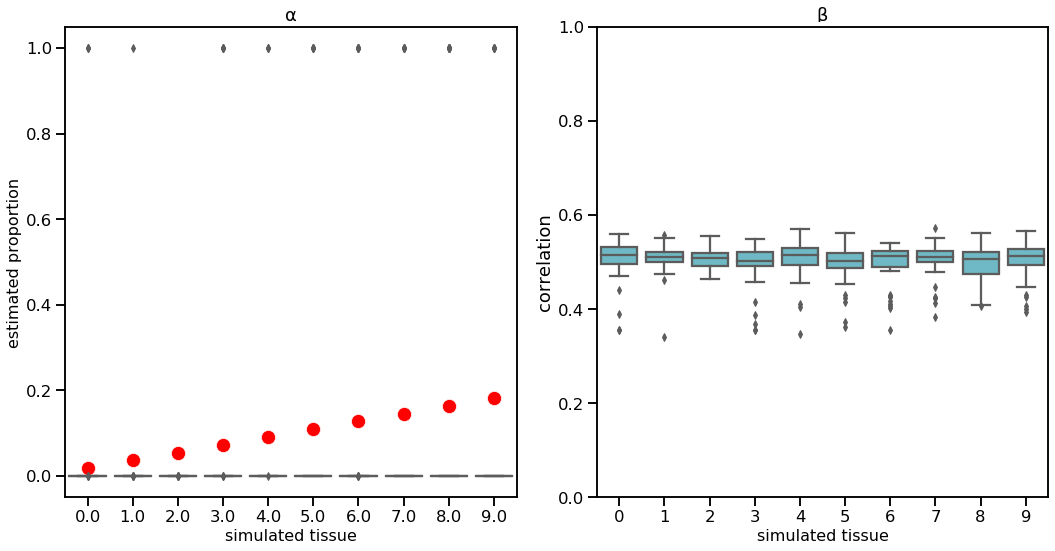

In [203]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_1x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_1x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_1x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 10x

In [204]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_10x/"
one_per_10x = load_pickles(directory, "alpha")
gamma_corr_10x = load_gamma_corr(directory, "gamma")

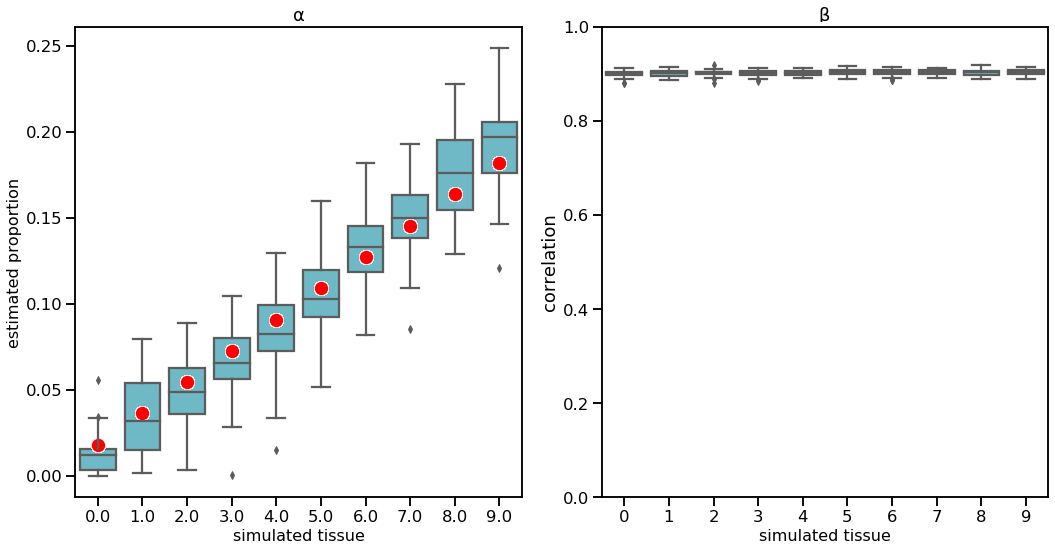

In [205]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_10x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_10x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_10x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 100x

In [206]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_100x/"
one_per_100x = load_pickles(directory, "alpha")
gamma_corr_100x = load_gamma_corr(directory, "gamma")

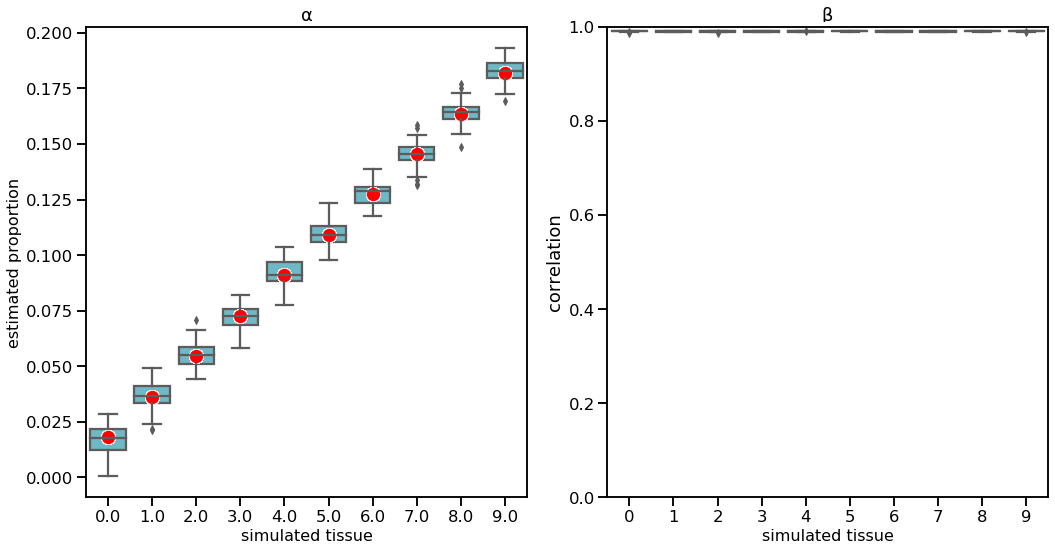

In [207]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_100x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_100x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_100x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


### 1000x

In [208]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_1000x/"
one_per_1000x = load_pickles(directory, "alpha")
gamma_corr_1000x = load_gamma_corr(directory, "gamma")

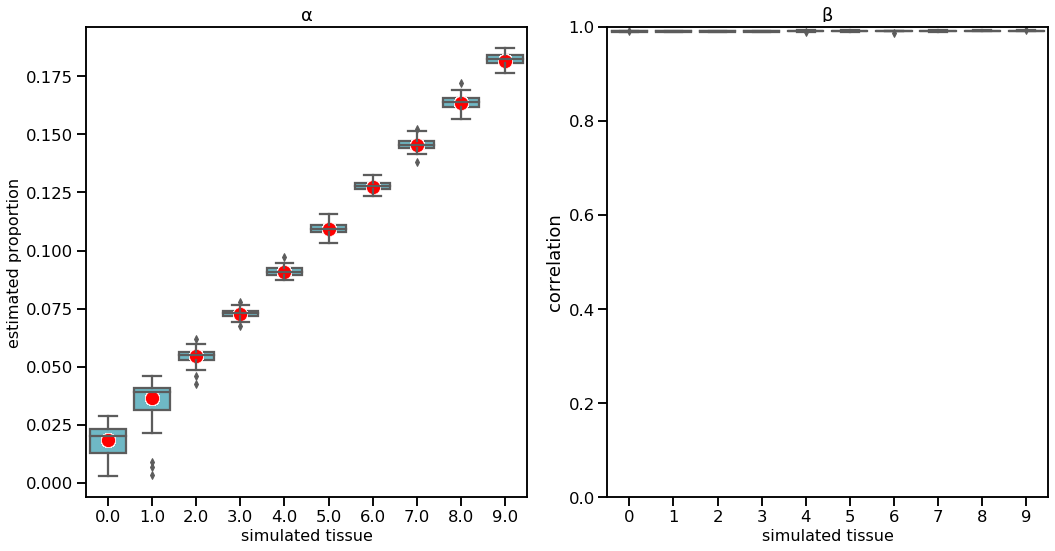

In [209]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_1000x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_1000x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_1000x, color="#61c2d3", ax=ax2)

ax1.set_xlabel("simulated tissue", fontsize=16)
ax2.set_xlabel("simulated tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax2.set_ylim(0, 1)

fig.tight_layout()


## Uniform Random Varying Depth and Fixed Tissue Proportion 

Generate true methylation proportions from a random uniform. Fix one tissue of interest at (0, 0.01, 0.1, 1,  5, 50, 100) percents. Let other tissues be random so that they sum to one. Vary the depth. 

### 10 people, 1000 sites, variable depth

In [210]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x/"
vary_perc_1x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x/"
vary_perc_10x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x/"
vary_perc_100x = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x/"
vary_perc_1000x = load_gamma_corr(directory, "alpha")

In [211]:
percent_names = {"0":0.0, "1":0.001, "2":0.01, "3":0.1, "4":1, "5":5, "6":10, "7":20, "8":50, "9":100}

vary_perc_1x = vary_perc_1x.replace({"tissue": percent_names})
vary_perc_10x = vary_perc_10x.replace({"tissue": percent_names})
vary_perc_100x = vary_perc_100x.replace({"tissue": percent_names})
vary_perc_1000x = vary_perc_1000x.replace({"tissue": percent_names})

#### 1, 10, and 100x depth

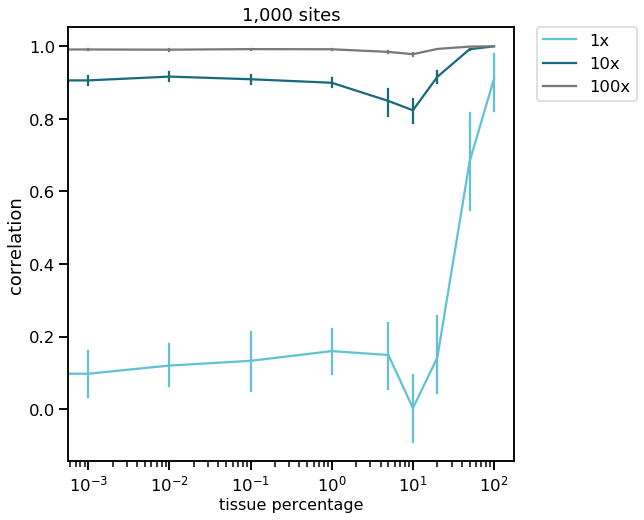

In [212]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_1x, label="1x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_10x, label="10x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x, label="100x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("1,000 sites")
plt.show()

#### 10 100, and 1000x depth

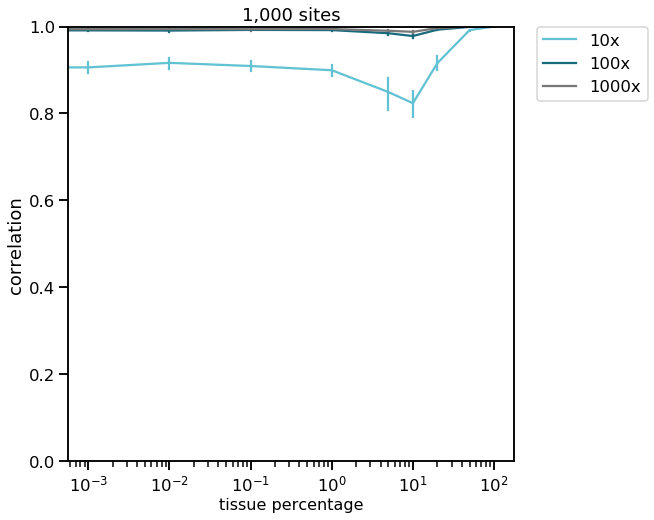

In [218]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_10x, label="10x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x, label="100x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_1000x, label="1000x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("1,000 sites")
ax.set_ylim(0, 1)
plt.show()

### 10 people, 100 sites, variable depth

In [198]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x_100/"
vary_perc_1x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_100/"
vary_perc_10x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_100/"
vary_perc_100x_100 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_100/"
vary_perc_1000x_100 = load_gamma_corr(directory, "alpha")

In [199]:
vary_perc_1x_100 = vary_perc_1x_100.replace({"tissue": percent_names})
vary_perc_10x_100 = vary_perc_10x_100.replace({"tissue": percent_names})
vary_perc_100x_100 = vary_perc_100x_100.replace({"tissue": percent_names})
vary_perc_1000x_100 = vary_perc_1000x_100.replace({"tissue": percent_names})

#### 1, 10, and 100x depth

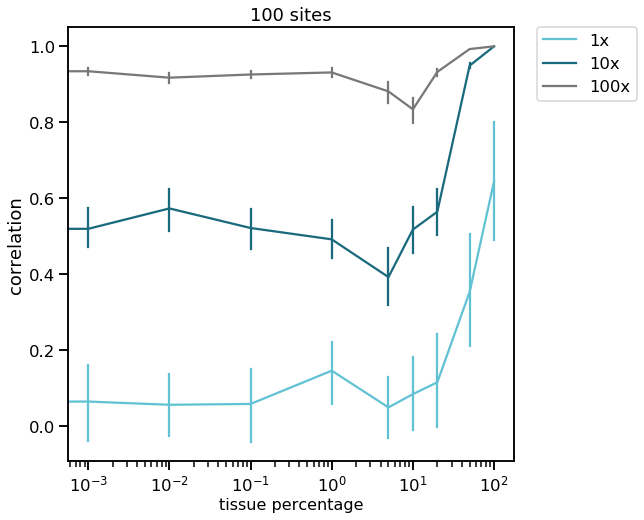

In [200]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_1x_100, label="1x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_10x_100, label="10x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x_100, label="100x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("100 sites")
plt.show()

#### 10x, 100x, 1000x depths

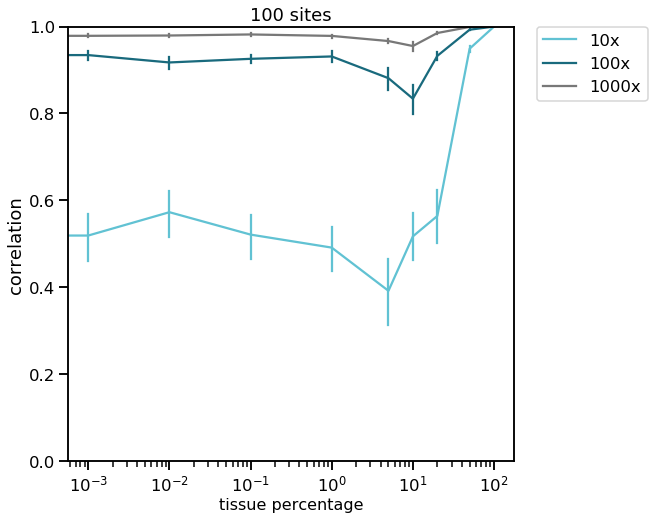

In [221]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_10x_100, label="10x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x_100, label="100x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_1000x_100, label="1000x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("100 sites")
ax.set_ylim(0, 1)
plt.show()

### 10 people, 10000 sites, variable depth

In [214]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1x_10000/"
vary_perc_1x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_10x_10000/"
vary_perc_10x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_100x_10000/"
vary_perc_100x_10000 = load_gamma_corr(directory, "alpha")

directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_vary_perc_1000x_10000/"
vary_perc_1000x_10000 = load_gamma_corr(directory, "alpha")

In [222]:
vary_perc_1x_10000 = vary_perc_1x_10000.replace({"tissue": percent_names})
vary_perc_10x_10000 = vary_perc_10x_10000.replace({"tissue": percent_names})
vary_perc_100x_10000 = vary_perc_100x_10000.replace({"tissue": percent_names})
vary_perc_1000x_10000 = vary_perc_1000x_10000.replace({"tissue": percent_names})

#### 1x, 10x, 100x depths

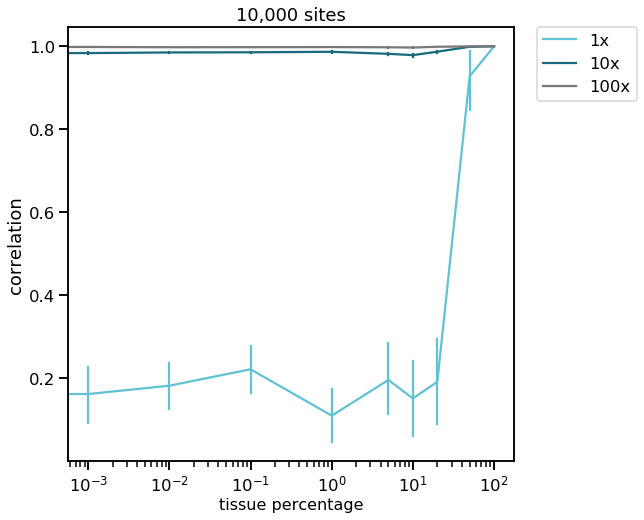

In [223]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_1x_10000, label="1x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_10x_10000, label="10x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x_10000, label="100x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("10,000 sites")
plt.show()

#### 10x, 100x, 1000x depths

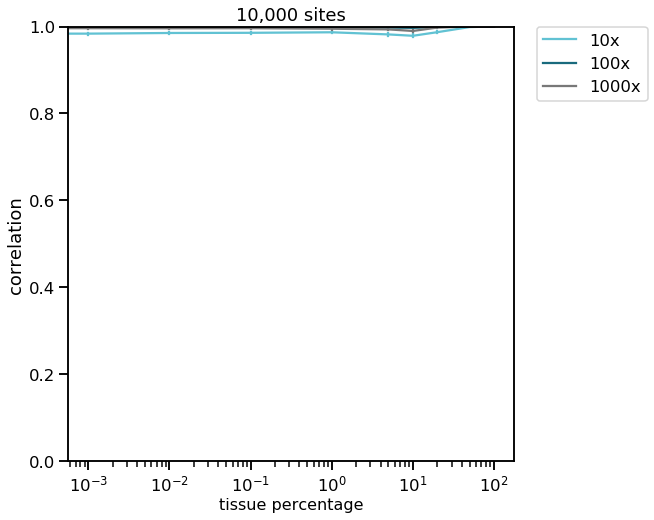

In [224]:
fig, ax = plt.subplots(figsize=(8,8))
s = sns.lineplot(x="tissue", y="correlation", err_style="bars", data=vary_perc_10x_10000, label="10x", color="#61c2d3")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_100x_10000, label="100x", color="#196a7d")
s = sns.lineplot(x="tissue", y="correlation",  err_style="bars", data=vary_perc_1000x_10000, label="1000x", color="#787878")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xscale="log")
ax.set_xlabel("tissue percentage", fontsize=16)
ax.set_title("10,000 sites")
ax.set_ylim(0, 1)
plt.show()

### all sites together 

subset to informative values

In [278]:
vary_perc_1x_10000_subset = vary_perc_1x_10000[vary_perc_1x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_10000_subset = vary_perc_10x_10000[vary_perc_10x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_10000_subset = vary_perc_100x_10000[vary_perc_100x_10000['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_10000_subset = vary_perc_1000x_10000[vary_perc_1000x_10000['tissue'].isin([0, 0.001, 50, 100])]

In [279]:
vary_perc_1x_100_subset = vary_perc_1x_100[vary_perc_1x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_100_subset = vary_perc_10x_100[vary_perc_10x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_100_subset = vary_perc_100x_100[vary_perc_100x_100['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_100_subset = vary_perc_1000x_100[vary_perc_1000x_100['tissue'].isin([0, 0.001, 50, 100])]

In [280]:
vary_perc_1x_subset = vary_perc_1x[vary_perc_1x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_10x_subset = vary_perc_10x[vary_perc_10x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_100x_subset = vary_perc_100x[vary_perc_100x['tissue'].isin([0, 0.001, 50, 100])]
vary_perc_1000x_subset = vary_perc_100x[vary_perc_1000x['tissue'].isin([0, 0.001, 50, 100])]

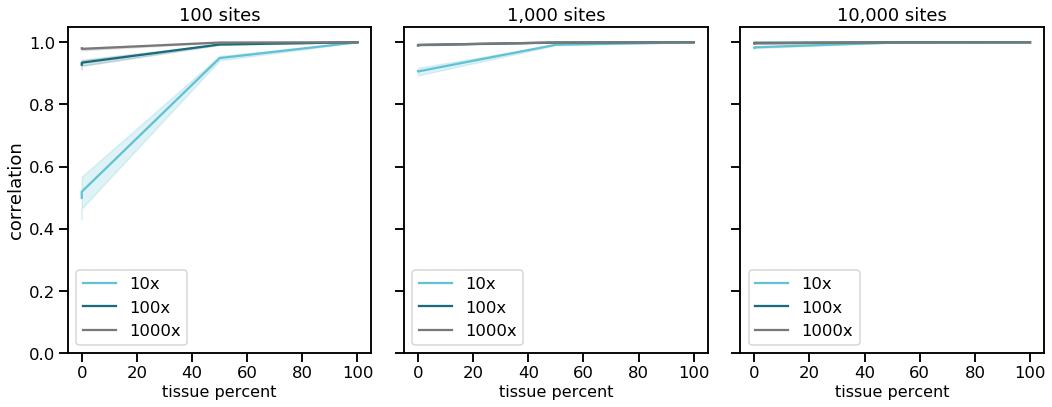

In [282]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_100_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_100_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_100_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_10000_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_10000_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_10000_subset, label="1000x", color="#787878", ax=ax3)

# ax1.set(xscale="log")
# ax2.set(xscale="log")
# ax3.set(xscale="log")

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()


### all sites, rare tissues only 

In [283]:
vary_perc_1x_10000_subset = vary_perc_1x_10000[vary_perc_1x_10000['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_10x_10000_subset = vary_perc_10x_10000[vary_perc_10x_10000['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_100x_10000_subset = vary_perc_100x_10000[vary_perc_100x_10000['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_1000x_10000_subset = vary_perc_1000x_10000[vary_perc_1000x_10000['tissue'].isin([0, 0.001, 0.01, 1, 10])]

In [284]:
vary_perc_1x_100_subset = vary_perc_1x_100[vary_perc_1x_100['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_10x_100_subset = vary_perc_10x_100[vary_perc_10x_100['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_100x_100_subset = vary_perc_100x_100[vary_perc_100x_100['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_1000x_100_subset = vary_perc_1000x_100[vary_perc_1000x_100['tissue'].isin([0, 0.001, 0.01, 1, 10])]

In [285]:
vary_perc_1x_subset = vary_perc_1x[vary_perc_1x['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_10x_subset = vary_perc_10x[vary_perc_10x['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_100x_subset = vary_perc_100x[vary_perc_100x['tissue'].isin([0, 0.001, 0.01, 1, 10])]
vary_perc_1000x_subset = vary_perc_100x[vary_perc_1000x['tissue'].isin([0, 0.001, 0.01, 1, 10])]

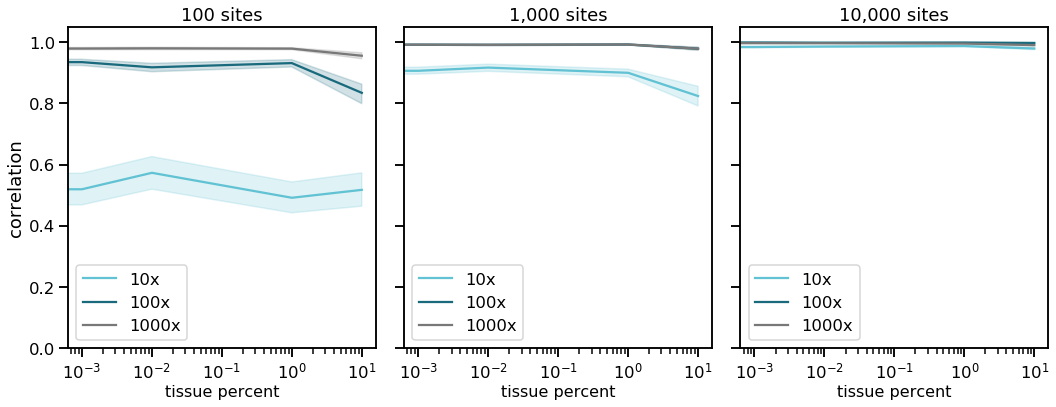

In [286]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,6))

sns.set_context("talk")

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_100_subset, label="10x", color="#61c2d3", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_100_subset, label="100x", color="#196a7d", ax=ax1)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_100_subset, label="1000x", color="#787878", ax=ax1)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_subset, label="10x", color="#61c2d3", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_subset, label="100x", color="#196a7d", ax=ax2)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_subset, label="1000x", color="#787878", ax=ax2)

sns.lineplot(x="tissue", y="correlation", data=vary_perc_10x_10000_subset, label="10x", color="#61c2d3", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_100x_10000_subset, label="100x", color="#196a7d", ax=ax3)
sns.lineplot(x="tissue", y="correlation", data=vary_perc_1000x_10000_subset, label="1000x", color="#787878", ax=ax3)

ax1.set(xscale="log")
ax2.set(xscale="log")
ax3.set(xscale="log")

ax1.set_xlabel("tissue percent", fontsize=16)
ax2.set_xlabel("tissue percent", fontsize=16)
ax3.set_xlabel("tissue percent", fontsize=16)

ax1.set_title("100 sites")
ax2.set_title("1,000 sites")
ax3.set_title("10,000 sites")


ax1.set_ylim(0, 1.05)

fig.tight_layout()
